The 70 ECG recordings were categorized into three distinct classes based on the duration of disordered breathing:

Class C (Control): 11 recordings with fewer than 5 minutes of disordered breathing, considered normal. This group consists of six males and five females, with a mean age of 33 years.

Class A (Apnea): 40 recordings having 100 or more minutes of disordered breathing, classified as apnea. The subjects of this class include fifteen men and one woman, with a mean age of 50 years.

Class B (Borderline Apnea): 10 recordings with 10 to 96 minutes of disordered breathing, considered as borderline cases. This group is comprised of four men and one woman, with a mean age of 46 years.

These classes encapsulate the variations in disordered breathing, ranging from normal to significant apnea. The borderline group contains recordings from both healthy volunteers and apnea patients, emphasizing the complexity in categorizing certain cases.

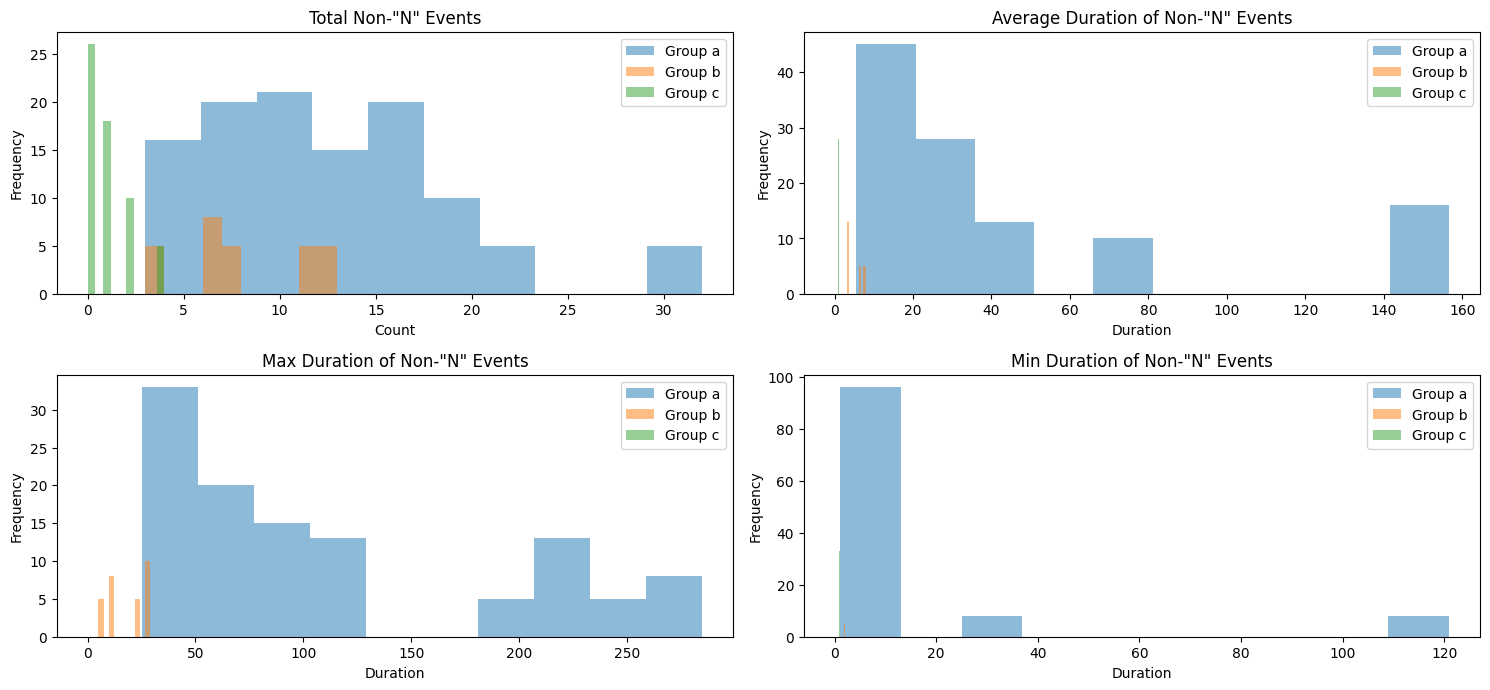

In [26]:
import os
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

source_dir = 'apnea-ecg-database-1.0.0'
# Define the groups
group_A, group_B, group_C = [], [], []

# Iterate through the files in the directory
for filename in os.listdir(source_dir):
    # Get the filename without extension
    file_header = os.path.splitext(filename)[0]
    
    # Check the first character and categorize the file accordingly
    if file_header[0] == 'a':
        group_A.append(file_header)
    elif file_header[0] == 'b':
        group_B.append(file_header)
    elif file_header[0] == 'c':
        group_C.append(file_header)

# Print the groups
print("Group A:", group_A,'\n')
print("Group B:", group_B,'\n')
print("Group C:", group_C,'\n')


groups = {'a':group_A ,'b': group_B, 'c': group_C}
#groups = {'a': [], 'b': [], 'c': []}
statistics = {'a': {}, 'b': {}, 'c': {}}


# Function to calculate statistics for each record
def calculate_statistics(recordname):
    record = wfdb.rdsamp(recordname)
    annotation = wfdb.rdann(recordname, 'apn')
    symbols = annotation.symbol
    non_n_durations = []
    current_duration = 0
    for symbol in symbols:
        if symbol != 'N':
            current_duration += 1
        else:
            if current_duration > 0:
                non_n_durations.append(current_duration)
                current_duration = 0
    if current_duration > 0:
        non_n_durations.append(current_duration)

    return {
        "total_non_n_events": len(non_n_durations),
        "average_duration": np.mean(non_n_durations) if non_n_durations else 0,
        "max_duration": max(non_n_durations, default=0),
        "min_duration": min(non_n_durations, default=0),
        "most_common_non_n_symbol": Counter([symbol for symbol in symbols if symbol != 'N']).most_common(1)[0] if non_n_durations else ("None", 0)
    }

# Iterate through each group and calculate the statistics
for group_key, group in groups.items():
    for recordname in group:
       # print(recordname)
        try:
            stats = calculate_statistics(os.path.join(source_dir, recordname))
            for key, value in stats.items():
                statistics[group_key].setdefault(key, []).append(value)
        except:
            #print('passed',recordname)
            pass
# Plot the distributions
plt.figure(figsize=[15, 10])
for key, value in statistics.items():
    plt.subplot(3, 2, 1)
    plt.hist(value['total_non_n_events'], alpha=0.5, label=f'Group {key}')
    plt.title('Total Non-"N" Events')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.hist(value['average_duration'], alpha=0.5, label=f'Group {key}')
    plt.title('Average Duration of Non-"N" Events')
    plt.xlabel('Duration')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(3, 2, 3)
    plt.hist(value['max_duration'], alpha=0.5, label=f'Group {key}')
    plt.title('Max Duration of Non-"N" Events')
    plt.xlabel('Duration')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(3, 2, 4)
    plt.hist(value['min_duration'], alpha=0.5, label=f'Group {key}')
    plt.title('Min Duration of Non-"N" Events')
    plt.xlabel('Duration')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()
